## Import packages

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [7]:
from xgboost import XGBClassifier

## Loading the Data

In [8]:
df = pd.read_csv('fraud_data_features.csv')
pd.set_option('display.max_columns', 500)
df.head()

ssn               cc_num    first  last gender  \
0  8095-6382161-6  4770417457749054840  Jeffrey  Hall      M   
1  8095-6382161-6  4770417457749054840  Jeffrey  Hall      M   
2  8095-6382161-6  4770417457749054840  Jeffrey  Hall      M   
3  8095-6382161-6  4770417457749054840  Jeffrey  Hall      M   
4  8095-6382161-6  4770417457749054840  Jeffrey  Hall      M   

                                         street     city state    zip  \
0  B14 L73 Kelley Subdivision 3, Maxwell Avenue  Balanga    PH  96061   
1  B14 L73 Kelley Subdivision 3, Maxwell Avenue  Balanga    PH  96061   
2  B14 L73 Kelley Subdivision 3, Maxwell Avenue  Balanga    PH  96061   
3  B14 L73 Kelley Subdivision 3, Maxwell Avenue  Balanga    PH  96061   
4  B14 L73 Kelley Subdivision 3, Maxwell Avenue  Balanga    PH  96061   

       lat      long  city_pop                                 job  \
0  14.6833  120.5333     96061  Public relations account executive   
1  14.6833  120.5333     96061  Public relations account executive   
2  14.6833  120.5333     96061  Public relations account executive   
3  14.6833  120.5333     96061  Public relations account executive   
4  14.6833  120.5333     96061  Public relations account executive   

          dob      acct_num                         trans_num  \
0  1951-06-28  485205535176  479e730506849994bf555a5e2213d8c2   
1  1951-06-28  485205535176  fa27f363c2786088c7d8f1896d1f599b   
2  1951-06-28  485205535176  68fd2bae4a8f3c9b314c1ae83ef97ba0   
3  1951-06-28  485205535176  203a7b5ad67efb1914ba5fc980f6732e   
4  1951-06-28  485205535176  e1fee6bf8502ff3b0a1f9f2cd062aacd   

            trans_date           trans_time   unix_time      category  \
0  2021-11-23 00:00:00  2021-11-23 20:51:08  1637700668      misc_net   
1  2021-11-23 00:00:00  2021-11-23 23:18:35  1637709515  shopping_pos   
2  2021-11-23 00:00:00  2021-11-23 02:53:25  1637636005   grocery_pos   
3  2021-11-22 00:00:00  2021-11-22 23:04:49  1637622289     kids_pets   
4  2021-11-22 00:00:00  2021-11-22 12:12:30  1637583150  shopping_net   

       amt  is_fraud             merchant  merch_lat  merch_long PartofDay  \
0   869.78         1            CD-R King  14.643409  121.146161       day   
1   986.16         1         Ace Hardware  15.233140  119.601096     night   
2   292.96         1  Rustans Supermarket  15.416225  120.134359     night   
3    19.41         1          Play Nation  14.827007  121.515282     night   
4  1035.98         1               Shopee  15.477679  120.408269       day   

   DayofWeek  DayName        LocDist       ra_Tx    ra_LocDist  ra_LocDist_Fr  \
0          1  Tuesday   70264.774834  370.810000  92359.382843   83459.011814   
1          1  Tuesday  120858.344796  561.674286  83448.342512   83448.342512   
2          1  Tuesday   88980.881992  248.442857  93167.902192   86757.571059   
3          0   Monday  113282.115794  207.817143  95831.817689   86016.467415   
4          0   Monday   84115.871927  214.021429  91202.345099   72383.643225   

   ra_TxAmt_Wknd  ra_TxAmt_Night  ra_TxCount_Night  ra_TxCount_Daily  
0            NaN             NaN          1.428571          2.285714  
1            NaN      291.282857          1.428571          2.285714  
2            NaN      104.538571          1.428571          2.285714  
3            NaN       63.428571          1.142857          1.857143  
4            NaN             NaN          1.142857          1.857143

In [17]:
columns = df.columns.tolist()
columns = columns.tolist()
columns

['ssn',
 'cc_num',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'acct_num',
 'trans_num',
 'trans_date',
 'trans_time',
 'unix_time',
 'category',
 'amt',
 'is_fraud',
 'merchant',
 'merch_lat',
 'merch_long',
 'PartofDay',
 'DayofWeek',
 'DayName',
 'LocDist',
 'ra_Tx',
 'ra_LocDist',
 'ra_LocDist_Fr',
 'ra_TxAmt_Wknd',
 'ra_TxAmt_Night',
 'ra_TxCount_Night',
 'ra_TxCount_Daily']

## Exploratory Data Analysis

<AxesSubplot:xlabel='category', ylabel='is_fraud'>

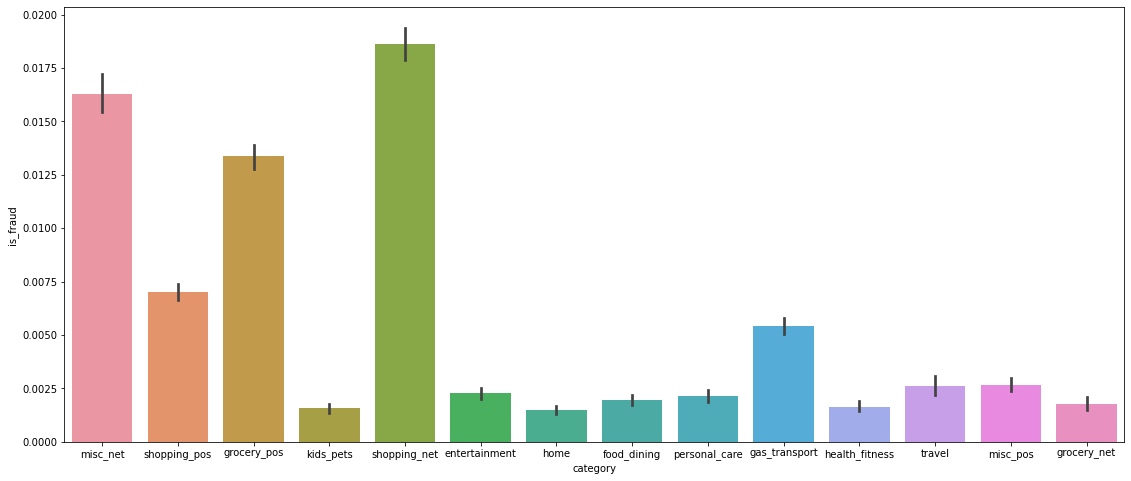

In [7]:
plt.figure(figsize=(19,8))
sns.barplot(x=df.category, y=df.is_fraud)

<AxesSubplot:xlabel='PartofDay', ylabel='is_fraud'>

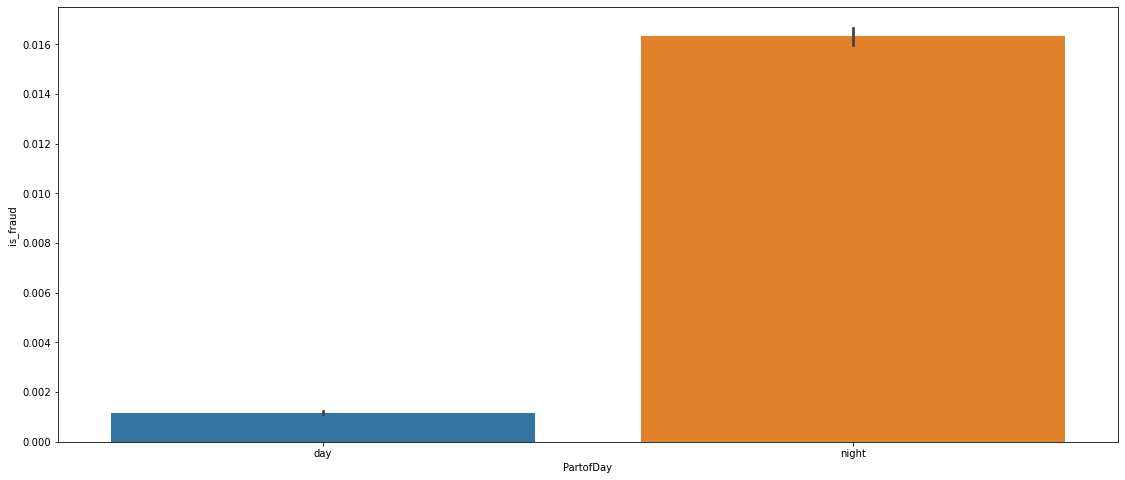

In [12]:
plt.figure(figsize=(19,8))
sns.barplot(x=df.PartofDay, y=df.is_fraud)

<AxesSubplot:xlabel='is_fraud', ylabel='city'>

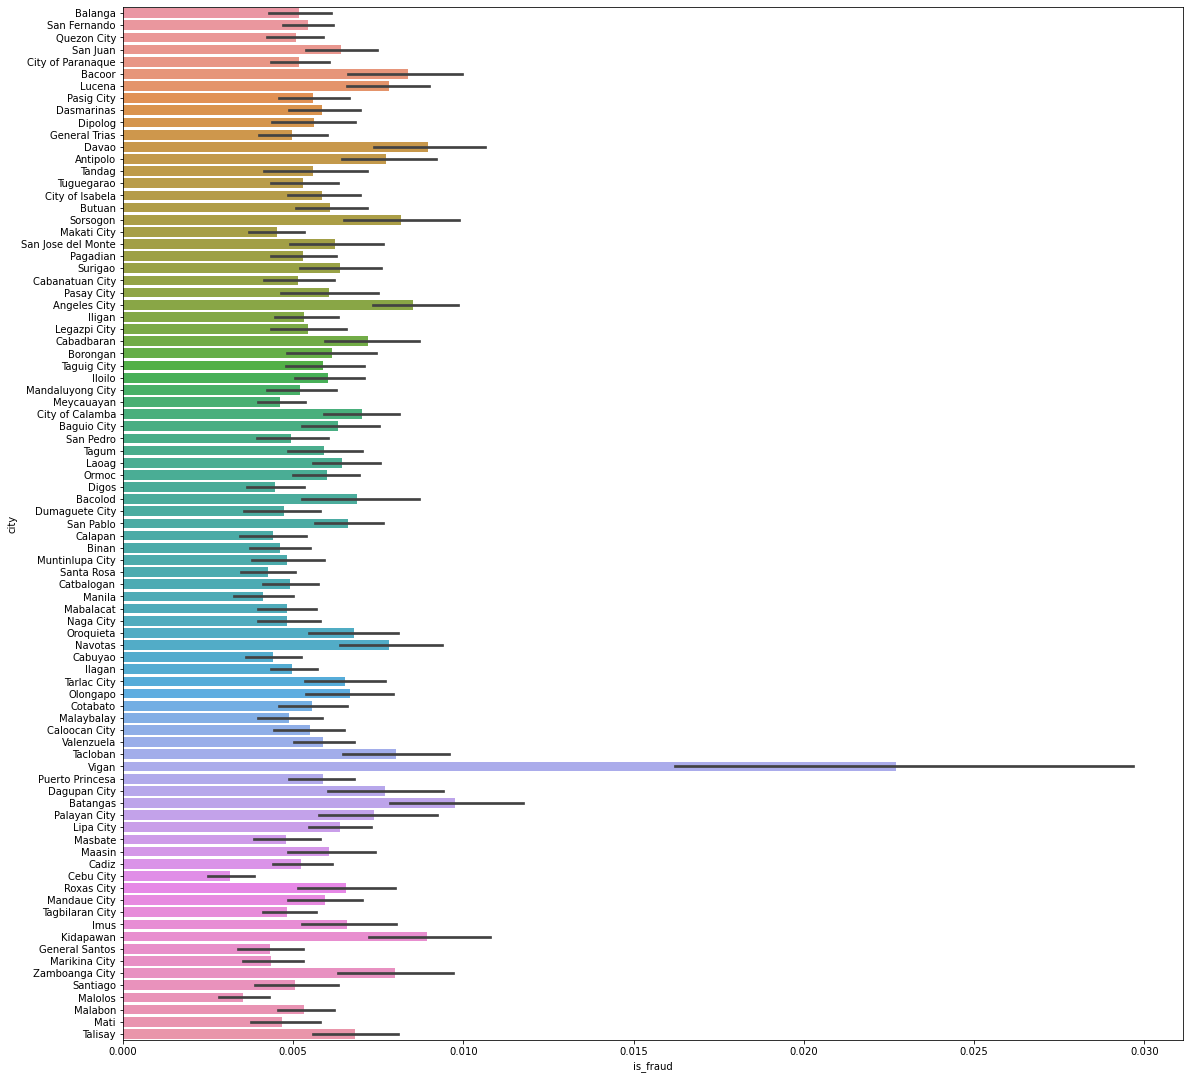

In [13]:
plt.figure(figsize=(19,19))
sns.barplot(y=df.city, x=df.is_fraud, data=df)

## Feature engineering and selection

In [8]:
df2 = df.drop(['ssn', 'cc_num', 'first', 'last', 'zip', 'street', 
               'state', 'city_pop', 'job', 'dob', 'acct_num'], axis=1)

In [9]:
#One Hot Encoding of Categorical Data
enc = OneHotEncoder(handle_unknown='ignore')

onehotcategory = pd.DataFrame(enc.fit_transform(df2[['category']]).toarray())
onehotcategory.columns = enc.get_feature_names(['category'])

onehotcity = pd.DataFrame(enc.fit_transform(df2[['city']]).toarray())
onehotcity.columns = enc.get_feature_names(['city'])

onehotlatenight = pd.DataFrame(enc.fit_transform(df2[['PartofDay']]).toarray())
onehotlatenight.columns = enc.get_feature_names(['PartofDay'])
onehotlatenight

onehotday = pd.DataFrame(enc.fit_transform(df2[['DayName']]).toarray())
onehotday.columns = enc.get_feature_names(['DayName'])

#onehotmerchant = pd.DataFrame(enc.fit_transform(df2[['merchant']]).toarray())
#onehotmerchant.columns = enc.get_feature_names(['merchant'])

In [10]:
#df_numeric = df2[['lat', 'long', 'unix_time', 'amt', 'merch_lat', 'merch_long',
#       'LocDist', 'ra_Tx', 'ra_LocDist', 'ra_LocDist_Fr', 'ra_TxAmt_Wknd', 'ra_TxAmt_Night', 'ra_TxCount_Night',
#      'ra_TxCount_Daily', 'is_fraud']]

df_numeric = df2[['lat', 'long', 'unix_time', 'amt', 'merch_lat', 'merch_long', 
                  'LocDist', 'ra_Tx', 'ra_LocDist', 'ra_TxAmt_Wknd', 'ra_TxAmt_Night', 'ra_TxCount_Night',
                  'ra_TxCount_Daily', 'is_fraud']]

In [11]:
xgdf = pd.concat([df_numeric, onehotcategory, onehotcity, onehotday], axis=1)

In [12]:
xgdf.shape

(1680778, 120)

In [13]:
xgdf.fillna(0)

lat      long   unix_time      amt  merch_lat  merch_long  \
0        14.6833  120.5333  1637700668   869.78  14.643409  121.146161   
1        14.6833  120.5333  1637709515   986.16  15.233140  119.601096   
2        14.6833  120.5333  1637636005   292.96  15.416225  120.134359   
3        14.6833  120.5333  1637622289    19.41  14.827007  121.515282   
4        14.6833  120.5333  1637583150  1035.98  15.477679  120.408269   
...          ...       ...         ...      ...        ...         ...   
1680773  14.6833  120.5333  1619193280   153.46  14.540567  121.448502   
1680774  14.6833  120.5333  1632155199     5.39  15.585504  121.387092   
1680775  14.6833  120.5333  1627138034     1.90  15.173498  120.742171   
1680776  14.6833  120.5333  1594406074    80.86  15.011012  120.351934   
1680777  14.6833  120.5333  1621567050    56.26  13.976257  120.713466   

               LocDist       ra_Tx    ra_LocDist  ra_TxAmt_Wknd  \
0         70264.774834  370.810000  92359.382843       0.000000   
1        120858.344796  561.674286  83448.342512       0.000000   
2         88980.881992  248.442857  93167.902192       0.000000   
3        113282.115794  207.817143  95831.817689       0.000000   
4         84115.871927  214.021429  91202.345099       0.000000   
...                ...         ...           ...            ...   
1680773  105844.472917   47.231429  69921.705039       0.000000   
1680774  135393.417942   37.724286  88242.474944       0.000000   
1680775   56404.405350   85.737143  84756.879249      85.737143   
1680776   39952.109969   73.745714  51223.533199       0.000000   
1680777   76356.880445   62.944286  75497.236800       0.000000   

         ra_TxAmt_Night  ra_TxCount_Night  ra_TxCount_Daily  is_fraud  \
0              0.000000          1.428571          2.285714         1   
1            291.282857          1.428571          2.285714         1   
2            104.538571          1.428571          2.285714         1   
3             63.428571          1.142857          1.857143         1   
4              0.000000          1.142857          1.857143         1   
...                 ...               ...               ...       ...   
1680773        0.000000          2.285714          6.428571         0   
1680774        0.000000          1.571429          5.571429         0   
1680775        0.000000          0.000000          5.571429         0   
1680776        0.000000          2.714286          6.571429         0   
1680777       48.167143          1.857143          6.142857         0   

         category_entertainment  category_food_dining  category_gas_transport  \
0                           0.0                   0.0                     0.0   
1                           0.0                   0.0                     0.0   
2                           0.0                   0.0                     0.0   
3                           0.0                   0.0                     0.0   
4                           0.0                   0.0                     0.0   
...                         ...                   ...                     ...   
1680773                     0.0                   1.0                     0.0   
1680774                     0.0                   0.0                     0.0   
1680775                     0.0                   0.0                     0.0   
1680776                     0.0                   0.0                     0.0   
1680777                     0.0                   0.0                     1.0   

         category_grocery_net  category_grocery_pos  category_health_fitness  \
0                         0.0                   0.0                      0.0   
1                         0.0                   0.0                      0.0   
2                         0.0                   1.0                      0.0   
3                         0.0                   0.0                      0.0   
4                         0.0                   0.0                  

In [14]:
xgdf_sample = xgdf.sample(frac=0.2)

## Train-Test Split

In [165]:
X = xgdf_sample.iloc[:, xgdf.columns != 'is_fraud']
y = xgdf_sample.is_fraud
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [31]:
X_test

lat      long   unix_time     amt  merch_lat  merch_long  \
1139783   6.7500  125.3500  1616808788  176.70   6.958384  124.764236   
622088   11.6000  125.4333  1593770277   68.32  11.146539  125.367792   
1107484  13.9411  121.1622  1594596288   16.92  13.897929  121.586217   
973057   14.3167  121.1167  1632443571   29.47  14.776614  122.041906   
1181414  14.8433  120.8114  1590759822   22.31  15.429653  120.104681   
...          ...       ...         ...     ...        ...         ...   
373768   15.0333  120.6833  1609017661   35.31  15.424872  120.731546   
1678090  14.6833  120.5333  1608109586   78.17  15.011782  120.491544   
682016   13.3667  121.2000  1600252788   31.48  13.536001  121.070778   
593353   13.7500  121.0500  1592848483   43.38  14.135312  120.176818   
1013277  11.7833  124.8833  1595604047  208.09  12.310140  125.315552   

               LocDist       ra_Tx    ra_LocDist  ra_TxAmt_Wknd  \
1139783   74884.672279   77.521429  83461.108943      87.824286   
622088    47024.959714   41.835714  79912.222592            NaN   
1107484   49079.242380   27.004286  74288.330012      27.004286   
973057   116312.764836   30.515714  91697.459273            NaN   
1181414  101139.456386  171.821429  92552.079389            NaN   
...                ...         ...           ...            ...   
373768    41261.534668   56.771429  74589.788185      54.135714   
1678090   34569.879988  204.494286  63428.027405            NaN   
682016    23037.516598   27.372857  80200.265839            NaN   
593353   108274.492810   69.018571  91984.252888            NaN   
1013277   74144.691330   53.838571  98189.163536            NaN   

         ra_TxAmt_Night  ra_TxCount_Night  ra_TxCount_Daily  \
1139783       95.467143          1.285714          1.857143   
622088              NaN          2.285714          6.857143   
1107484       48.915714          2.000000          4.714286   
973057        30.870000          1.285714          4.285714   
1181414             NaN               NaN          6.142857   
...                 ...               ...               ...   
373768              NaN          2.000000          3.428571   
1678090             NaN          2.857143          9.714286   
682016              NaN          2.142857          4.571429   
593353              NaN               NaN          2.000000   
1013277             NaN          1.285714          2.000000   

         category_entertainment  category_food_dining  category_gas_transport  \
1139783                     0.0                   0.0                     0.0   
622088                      0.0                   0.0                     1.0   
1107484                     0.0                   0.0                     0.0   
973057                      0.0                   0.0                     0.0   
1181414                     0.0                   0.0                     0.0   
...                         ...                   ...                     ...   
373768                      0.0                   0.0                     0.0   
1678090                     0.0                   0.0                     1.0   
682016                      0.0                   0.0                     0.0   
593353                      1.0                   0.0                     0.0   
1013277                     0.0                   1.0                     0.0   

         category_grocery_net  category_grocery_pos  category_health_fitness  \
1139783                   0.0                   1.0                      0.0   
622088                    0.0                   0.0                      0.0   
1107484                   0.0                   0.0                      0.0   
973057                    1.0                   0.0                      0.0   
1181414                   0.0                   0.0                      1.0   
...                       ...                   ...                      ...   
373768                    0.0            

In [65]:
import xgboost
from xgboost import XGBClassifier 

d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [74]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": 0.5,
    "eval_metric": "error"
}
model = XGBClassifier(objective = "binary:logistic")

In [75]:
train_model = model.fit(X_train, y_train)

[11:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [76]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


## Classification Report

Accuracy score:  0.9987654688243693


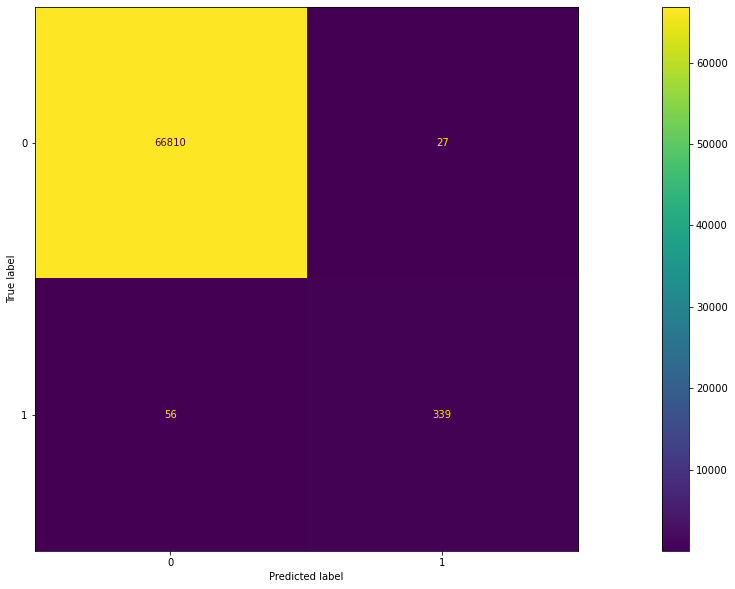

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
y_pred_rf = model.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66837
           1       0.93      0.86      0.89       395

    accuracy                           1.00     67232
   macro avg       0.96      0.93      0.95     67232
weighted avg       1.00      1.00      1.00     67232



In [162]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [194]:
pd.DataFrame(xgdf.iloc[291388,:]).T

lat      long     unix_time     amt  merch_lat  merch_long  \
291388  7.0083  125.0894  1.633045e+09  276.58   6.584813  124.161094   

              LocDist   ra_Tx    ra_LocDist  ra_TxAmt_Wknd  ra_TxAmt_Night  \
291388  121618.739342  773.73  88209.666732            NaN          762.93   

        ra_TxCount_Night  ra_TxCount_Daily  is_fraud  category_entertainment  \
291388               5.0               6.0       1.0                     0.0   

        category_food_dining  category_gas_transport  category_grocery_net  \
291388                   0.0                     0.0                   0.0   

        category_grocery_pos  category_health_fitness  category_home  \
291388                   1.0                      0.0            0.0   

        category_kids_pets  category_misc_net  category_misc_pos  \
291388                 0.0                0.0                0.0   

        category_personal_care  category_shopping_net  category_shopping_pos  \
291388                     0.0                    0.0                    0.0   

        category_travel  city_Angeles City  city_Antipolo  city_Bacolod  \
291388              0.0                0.0            0.0           0.0   

        city_Bacoor  city_Baguio City  city_Balanga  city_Batangas  \
291388          0.0               0.0           0.0            0.0   

        city_Binan  city_Borongan  city_Butuan  city_Cabadbaran  \
291388         0.0            0.0          0.0              0.0   

        city_Cabanatuan City  city_Cabuyao  city_Cadiz  city_Calapan  \
291388                   0.0           0.0         0.0           0.0   

        city_Caloocan City  city_Catbalogan  city_Cebu City  \
291388                 0.0              0.0             0.0   

        city_City of Calamba  city_City of Isabela  city_City of Paranaque  \
291388                   0.0                   0.0                     0.0   

        city_Cotabato  city_Dagupan City  city_Dasmarinas  city_Davao  \
291388            0.0                0.0              0.0         0.0   

        city_Digos  city_Dipolog  city_Dumaguete City  city_General Santos  \
291388         0.0           0.0                  0.0                  0.0   

        city_General Trias  city_Ilagan  city_Iligan  city_Iloilo  city_Imus  \
291388                 0.0          0.0          0.0          0.0        0.0   

        city_Kidapawan  city_Laoag  city_Legazpi City  city_Lipa City  \
291388             1.0         0.0                0.0             0.0   

        city_Lucena  city_Maasin  city_Mabalacat  city_Makati City  \
291388          0.0          0.0             0.0               0.0   

        city_Malabon  city_Malaybalay  city_Malolos  city_Mandaluyong City  \
291388           0.0              0.0           0.0                    0.0   

        city_Mandaue City  city_Manila  city_Marikina City  city_Masbate  \
291388                0.0          0.0                 0.0           0.0   

        city_Mati  city_Meycauayan  city_Muntinlupa City  city_Naga City  \
291388        0.0              0.0                   0.0             0.0   

        city_Navotas  city_Olongapo  city_Ormoc  city_Oroquieta  \
291388           0.0            0.0         0.0             0.0   

        city_Pagadian  city_Palayan City  city_Pasay City  city_Pasig City  \
291388            0.0                0.0              0.0              0.0   

        city_Puerto Princesa  city_Quezon City  city_Roxas City  \
291388                   0.0               0.0              0.0   

        city_San Fernando  city_San Jose del Monte  city_San Juan  \
291388                0.0                      0.0            0.0   

        city_San Pablo  city_San Pedro  city_Santa Rosa  city_Santiago  \
291388             0.0             0.0              0.0            0.0   

        city_Sorsogon  city_Surigao  city_Tacloban  city_Tagbilaran City  \
291388            0.0           0.0            0.0                   0.0   

      

In [166]:
y_test

1139783    0
622088     0
1107484    0
973057     0
1181414    0
          ..
373768     0
1678090    0
682016     0
593353     0
1013277    0
Name: is_fraud, Length: 67232, dtype: int64

In [172]:
y_test[y_test == y_pred]

1139783    0
622088     0
1107484    0
973057     0
1181414    0
          ..
373768     0
1678090    0
682016     0
593353     0
1013277    0
Name: is_fraud, Length: 67149, dtype: int64

In [171]:
y_test.value_counts()

0    66837
1      395
Name: is_fraud, dtype: int64

In [175]:
y_test_incorrect = y_test[y_test==1]

In [178]:
y_test_incorrect.head()
pd.DataFrame(y_test_incorrect)

is_fraud
291388          1
168785          1
105018          1
1518877         1
1097465         1
...           ...
364323          1
86558           1
376402          1
1047263         1
1173025         1

[395 rows x 1 columns]

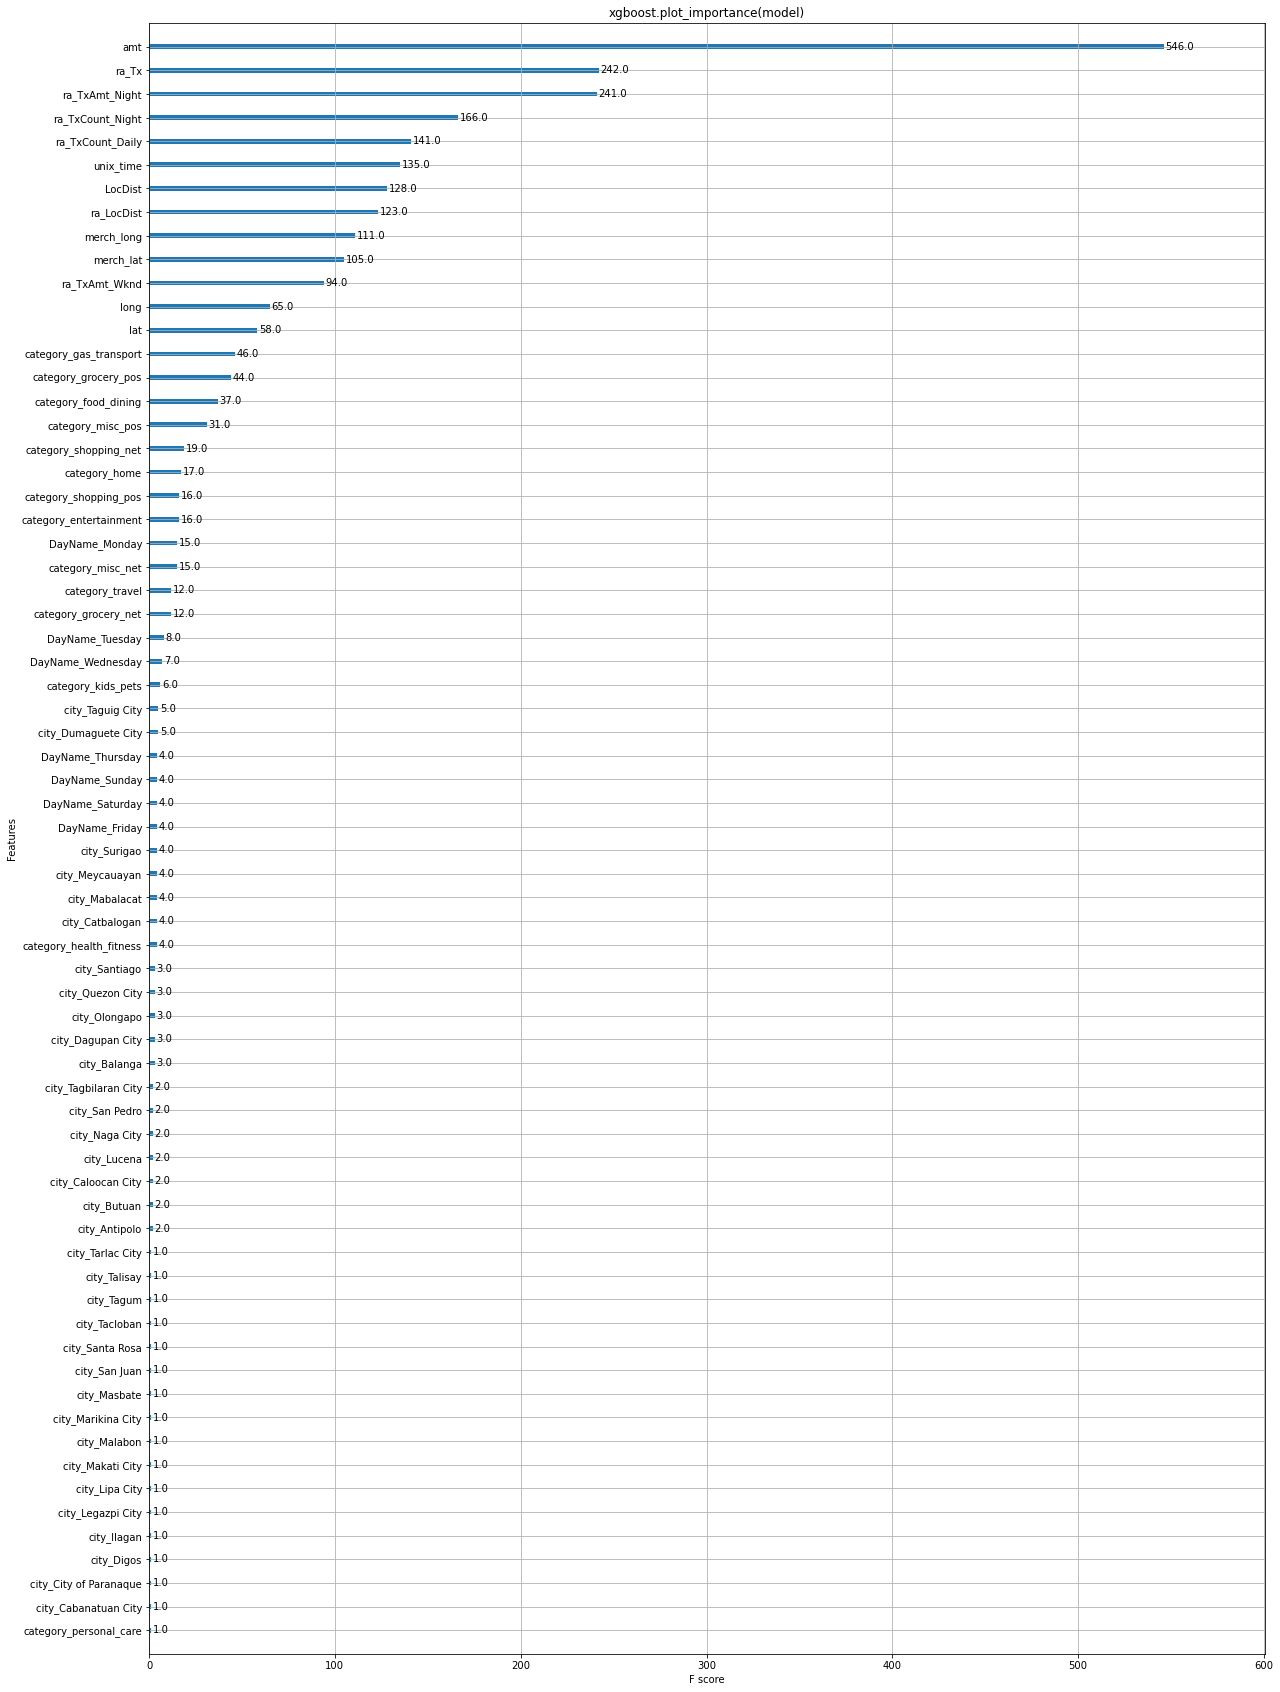

In [83]:
import matplotlib.pylab as pl
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.rcParams["figure.figsize"] = (30,10)
pl.show()

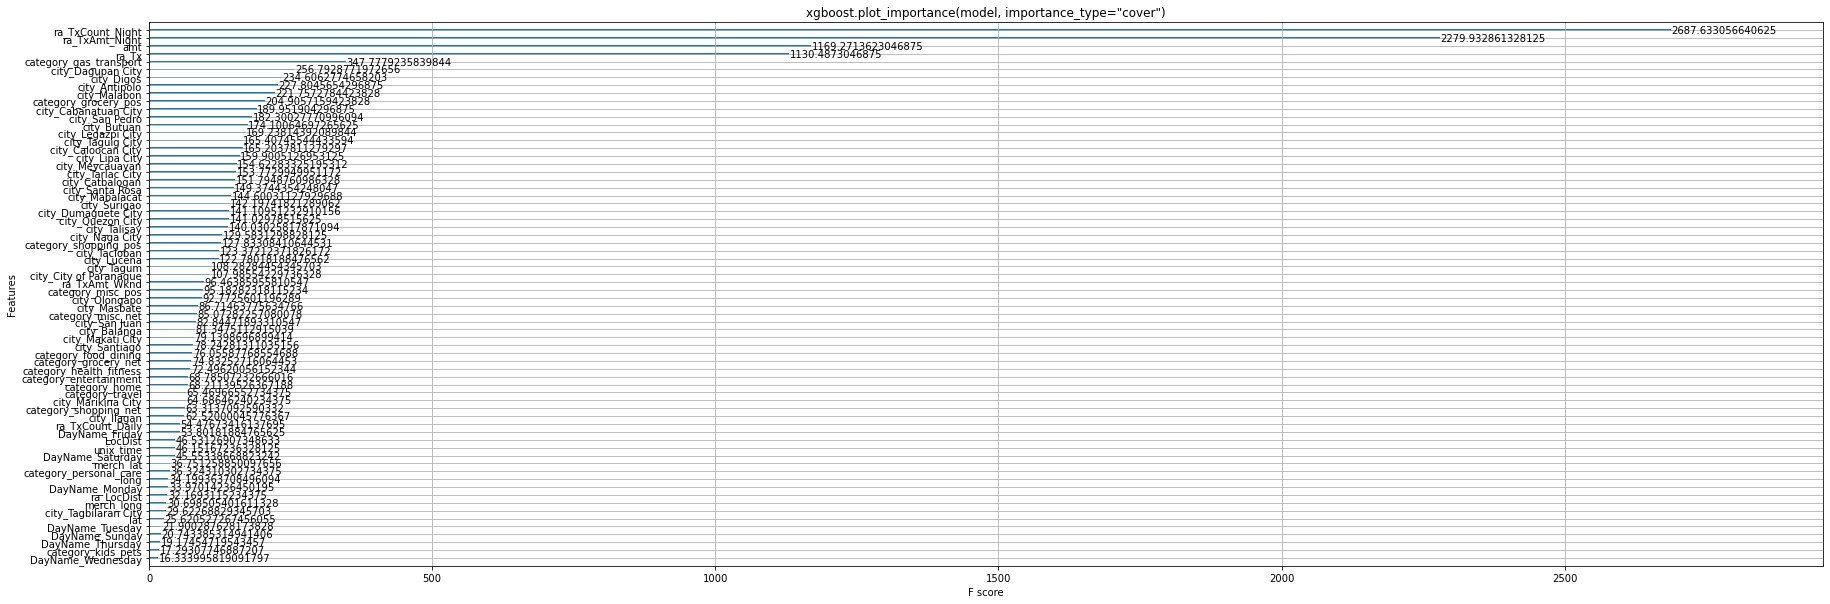

In [88]:
xgboost.plot_importance(model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.rcParams["figure.figsize"] = (30,10)
pl.show()

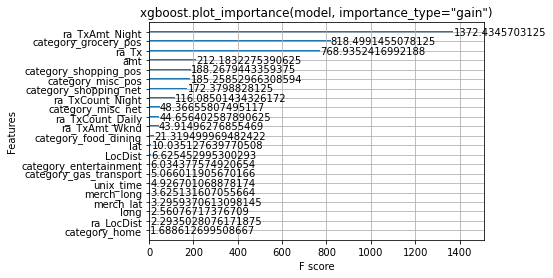

In [21]:
xgboost.plot_importance(model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [147]:
import shap

# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [195]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [196]:
i = 168785

In [197]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[i,:])

In [91]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000,:], df.iloc[:1000,:])

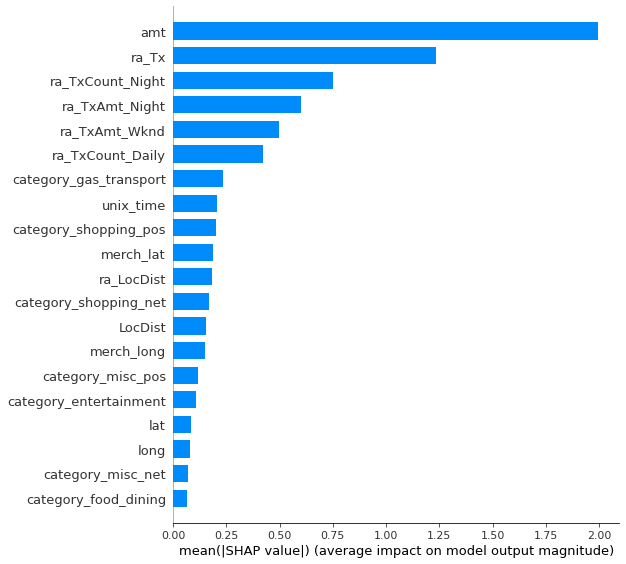

In [92]:
shap.summary_plot(shap_values, X, plot_type="bar")

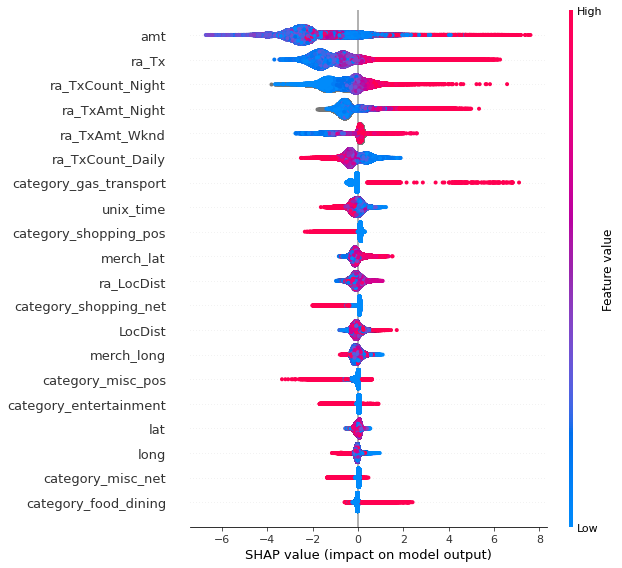

In [93]:
shap.summary_plot(shap_values, X)

## Save to joblib

In [108]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

In [99]:
xgdf.columns.tolist()

['lat',
 'long',
 'unix_time',
 'amt',
 'merch_lat',
 'merch_long',
 'LocDist',
 'ra_Tx',
 'ra_LocDist',
 'ra_TxAmt_Wknd',
 'ra_TxAmt_Night',
 'ra_TxCount_Night',
 'ra_TxCount_Daily',
 'is_fraud',
 'category_entertainment',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'city_Angeles City',
 'city_Antipolo',
 'city_Bacolod',
 'city_Bacoor',
 'city_Baguio City',
 'city_Balanga',
 'city_Batangas',
 'city_Binan',
 'city_Borongan',
 'city_Butuan',
 'city_Cabadbaran',
 'city_Cabanatuan City',
 'city_Cabuyao',
 'city_Cadiz',
 'city_Calapan',
 'city_Caloocan City',
 'city_Catbalogan',
 'city_Cebu City',
 'city_City of Calamba',
 'city_City of Isabela',
 'city_City of Paranaque',
 'city_Cotabato',
 'city_Dagupan City',
 'city_Dasm

In [100]:
feature_names = ['lat',
 'long',
 'unix_time',
 'amt',
 'merch_lat',
 'merch_long',
 'LocDist',
 'ra_Tx',
 'ra_LocDist',
 'ra_TxAmt_Wknd',
 'ra_TxAmt_Night',
 'ra_TxCount_Night',
 'ra_TxCount_Daily',
 'category_entertainment',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'city_Angeles City',
 'city_Antipolo',
 'city_Bacolod',
 'city_Bacoor',
 'city_Baguio City',
 'city_Balanga',
 'city_Batangas',
 'city_Binan',
 'city_Borongan',
 'city_Butuan',
 'city_Cabadbaran',
 'city_Cabanatuan City',
 'city_Cabuyao',
 'city_Cadiz',
 'city_Calapan',
 'city_Caloocan City',
 'city_Catbalogan',
 'city_Cebu City',
 'city_City of Calamba',
 'city_City of Isabela',
 'city_City of Paranaque',
 'city_Cotabato',
 'city_Dagupan City',
 'city_Dasmarinas',
 'city_Davao',
 'city_Digos',
 'city_Dipolog',
 'city_Dumaguete City',
 'city_General Santos',
 'city_General Trias',
 'city_Ilagan',
 'city_Iligan',
 'city_Iloilo',
 'city_Imus',
 'city_Kidapawan',
 'city_Laoag',
 'city_Legazpi City',
 'city_Lipa City',
 'city_Lucena',
 'city_Maasin',
 'city_Mabalacat',
 'city_Makati City',
 'city_Malabon',
 'city_Malaybalay',
 'city_Malolos',
 'city_Mandaluyong City',
 'city_Mandaue City',
 'city_Manila',
 'city_Marikina City',
 'city_Masbate',
 'city_Mati',
 'city_Meycauayan',
 'city_Muntinlupa City',
 'city_Naga City',
 'city_Navotas',
 'city_Olongapo',
 'city_Ormoc',
 'city_Oroquieta',
 'city_Pagadian',
 'city_Palayan City',
 'city_Pasay City',
 'city_Pasig City',
 'city_Puerto Princesa',
 'city_Quezon City',
 'city_Roxas City',
 'city_San Fernando',
 'city_San Jose del Monte',
 'city_San Juan',
 'city_San Pablo',
 'city_San Pedro',
 'city_Santa Rosa',
 'city_Santiago',
 'city_Sorsogon',
 'city_Surigao',
 'city_Tacloban',
 'city_Tagbilaran City',
 'city_Taguig City',
 'city_Tagum',
 'city_Talisay',
 'city_Tandag',
 'city_Tarlac City',
 'city_Tuguegarao',
 'city_Valenzuela',
 'city_Vigan',
 'city_Zamboanga City',
 'DayName_Friday',
 'DayName_Monday',
 'DayName_Saturday',
 'DayName_Sunday',
 'DayName_Thursday',
 'DayName_Tuesday',
 'DayName_Wednesday']

In [107]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.to_numpy(), feature_names=feature_names, class_names=['Not Fraud', 'Fraud'], discretize_continuous=False)

In [143]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.to_numpy(), feature_names = feature_names, 
                                 mode = 'classification', training_labels=xgdf['is_fraud'])

In [119]:
model = joblib.load('model.joblib')

In [120]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
i = 534

In [145]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[i,:])

AttributeError: 'LimeTabularExplainer' object has no attribute 'expected_value'

In [139]:
def prob(xgdf):
    return np.array(list(zip(1-model.predict(data),model.predict(xgdf))))

In [140]:
exp = explainer.explain_instance(xgdf.loc[i,feature_names].astype(int).values, prob, num_features=5)

ValueError: Domain error in arguments.

In [136]:
#exp = explainer.explain_instance(X_test.to_numpy()[i], model.predict_proba, num_features=10, top_labels=1)

ValueError: Domain error in arguments.

In [117]:
exp.show_in_notebook(show_table=True, show_all=True)

NameError: name 'exp' is not defined